<a href="https://colab.research.google.com/github/fellipediniz/dados_educacionais/blob/main/Dados_Frequ%C3%AAncia_Escolar_IBGE_Fellipe_Diniz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

 Este estudo tem como objetivo analisar o perfil de frequência escolar no Brasil, abrangendo diversas faixas etárias. Utilizando dados atualizados do Instituto Brasileiro de Geografia e Estatística (IBGE) de 2023, buscamos compreender as tendências, padrões e possíveis desafios no cenário educacional brasileiro. Através desta análise, esperamos fornecer insights valiosos que possam informar políticas educacionais e práticas pedagógicas, contribuindo para a melhoria da educação no Brasil.

# Importando Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

<ipython-input-2-9c38fd877c25>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [ ]:
df_taxa_escola = pd.read_excel("/content/Taxa_escolarizacao.xlsx")

In [ ]:
df_taxa_escola

,Localidades,total,0 a 3 anos,4 a 5 anos,6 a 10 anos,11 a 14 anos,6 a 14 anos,15 a 17 anos,18 a 24 anos,25 anos ou mais
0,Brasil,27.226648,36.007534,91.535465,99.328115,99.383091,99.352472,92.191033,30.369858,5.059085
1,Norte,31.265919,19.132321,82.761761,98.870723,98.419797,98.669050,91.833272,32.054709,5.847018
2,Rondônia,28.092047,16.152656,85.579010,99.450121,97.558689,98.635756,95.486916,31.409081,5.826684
3,Porto Velho,29.732740,21.733395,82.441489,99.302823,96.277636,97.877131,93.270953,34.449075,6.791017
4,Acre,32.334076,17.935550,75.047880,97.452904,98.550712,97.930238,89.025289,34.504167,6.005173
5,Rio Branco,32.055329,19.948788,79.176056,98.532338,99.272646,98.834294,90.767408,41.546126,6.639028
6,Amazonas,32.028265,15.474859,78.023615,97.609807,98.436334,97.977716,91.401757,29.281128,6.909982
7,Manaus,30.889557,15.817421,79.906437,97.654419,99.030517,98.257961,95.341088,33.971003,7.744469
8,Roraima,30.499051,21.491553,80.718321,95.993416,94.675711,95.443717,90.130380,26.322827,5.601726
9,Boa Vista,30.249976,21.944584,72.706624,95.374221,93.633646,94.635853,89.039218,28.810968,6.355997


In [ ]:
print(df_taxa_escola.columns)

Index(['Localidades', 'total', '0 a 3 anos', '4 a 5 anos', '6 a 10 anos',
       '11 a 14 anos', '6 a 14 anos', '15 a 17 anos', '18 a 24 anos',
       '25 anos ou mais'],
      dtype='object')


# Tratando os Dados

In [ ]:
df_taxa_escola = df_taxa_escola.drop([59,60, 61])

In [ ]:
df_taxa_escola

,Localidades,total,0 a 3 anos,4 a 5 anos,6 a 10 anos,11 a 14 anos,6 a 14 anos,15 a 17 anos,18 a 24 anos,25 anos ou mais
0,Brasil,27.226648,36.007534,91.535465,99.328115,99.383091,99.352472,92.191033,30.369858,5.059085
1,Norte,31.265919,19.132321,82.761761,98.870723,98.419797,98.669050,91.833272,32.054709,5.847018
2,Rondônia,28.092047,16.152656,85.579010,99.450121,97.558689,98.635756,95.486916,31.409081,5.826684
3,Porto Velho,29.732740,21.733395,82.441489,99.302823,96.277636,97.877131,93.270953,34.449075,6.791017
4,Acre,32.334076,17.935550,75.047880,97.452904,98.550712,97.930238,89.025289,34.504167,6.005173
5,Rio Branco,32.055329,19.948788,79.176056,98.532338,99.272646,98.834294,90.767408,41.546126,6.639028
6,Amazonas,32.028265,15.474859,78.023615,97.609807,98.436334,97.977716,91.401757,29.281128,6.909982
7,Manaus,30.889557,15.817421,79.906437,97.654419,99.030517,98.257961,95.341088,33.971003,7.744469
8,Roraima,30.499051,21.491553,80.718321,95.993416,94.675711,95.443717,90.130380,26.322827,5.601726
9,Boa Vista,30.249976,21.944584,72.706624,95.374221,93.633646,94.635853,89.039218,28.810968,6.355997


In [ ]:
df_taxa_escola.dtypes

Localidades        object 
total              float64
0 a 3 anos         float64
4 a 5 anos         float64
6 a 10 anos        float64
11 a 14 anos       float64
6 a 14 anos        float64
15 a 17 anos       float64
18 a 24 anos       float64
25 anos ou mais    float64
dtype: object

In [ ]:
df_taxa_escola['Localidades'] = df_taxa_escola['Localidades'].astype('string')

In [ ]:
df_taxa_escola.dtypes

Localidades        string 
total              float64
0 a 3 anos         float64
4 a 5 anos         float64
6 a 10 anos        float64
11 a 14 anos       float64
6 a 14 anos        float64
15 a 17 anos       float64
18 a 24 anos       float64
25 anos ou mais    float64
dtype: object

In [ ]:
#criando um dataframe baseado nos dados por região
df_escola_regiao = df_taxa_escola.loc[[1, 16, 35, 44, 51]]
df_escola_regiao

,Localidades,total,0 a 3 anos,4 a 5 anos,6 a 10 anos,11 a 14 anos,6 a 14 anos,15 a 17 anos,18 a 24 anos,25 anos ou mais
1,Norte,31.265919,19.132321,82.761761,98.870723,98.419797,98.669050,91.833272,32.054709,5.847018
16,Nordeste,28.247546,32.241688,93.603896,99.265945,99.272319,99.268810,90.915875,28.921710,4.620110
35,Sudeste,25.688774,43.086355,93.063333,99.572962,99.697732,99.628657,93.881859,29.807175,4.992621
44,Sul,26.581592,41.661002,91.578787,99.227964,99.460872,99.326168,90.448524,32.532787,5.263770
51,Centro-Oeste,28.631896,30.389434,87.920893,99.178217,99.454561,99.298255,92.402985,32.469346,5.748613


In [ ]:
df_escola_regiao = df_escola_regiao.drop('total', axis=1)

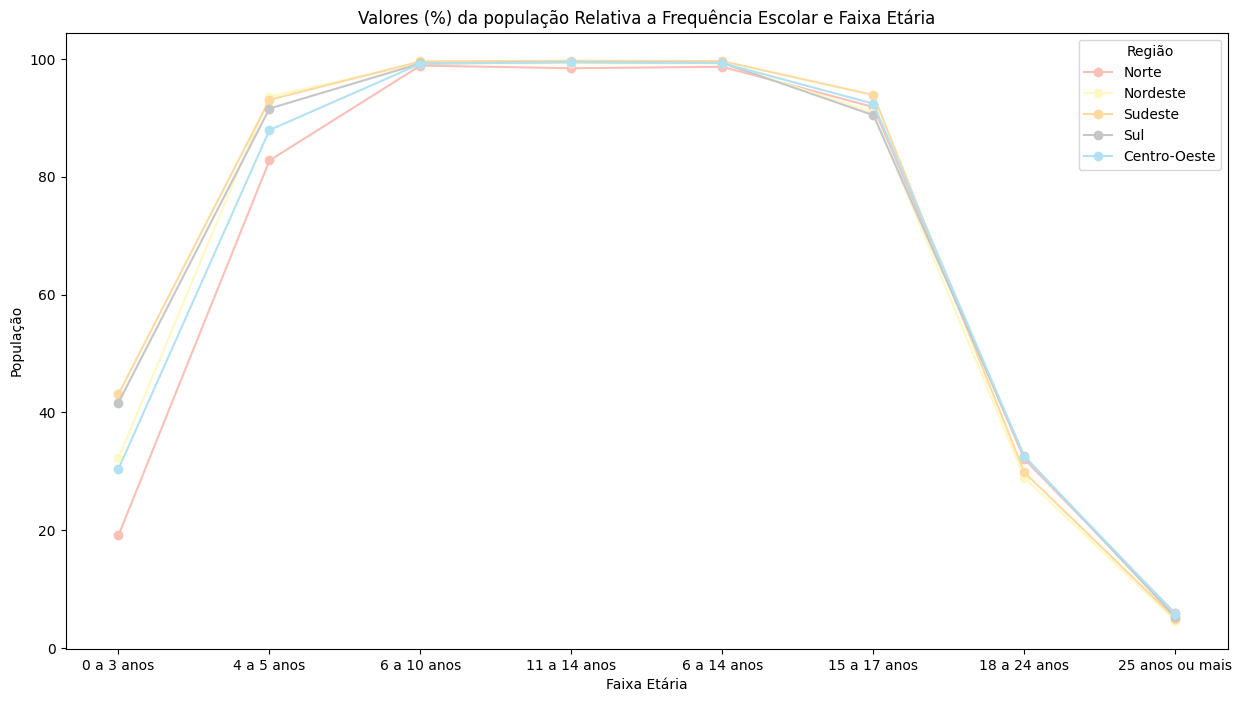

In [ ]:
# Definindo 'Região' como índice para facilitar o plot
df_escola_regiao.set_index('Localidades', inplace=True)

# Criando uma nova figura com tamanho especificado
fig, ax = plt.subplots(figsize=(15, 8))
cores = ['#fabfb7', '#fdf9c4', '#ffda9e', '#c5c6c8', '#b2e2f2', '#a3ffac', '#e79eff', '#d2bead', '#d3bcf6']
# Plotando o gráfico de linhas com pontos
df_escola_regiao.transpose().plot(kind='line', marker='o', color=cores, ax=ax)

# Configurando o gráfico
ax.set_title('Valores (%) da população Relativa a Frequência Escolar e Faixa Etária')
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('População')
ax.legend(title='Região')

# Mostrando o gráfico
plt.show()

O gráfico acima mostra as variações regionais da frequência escolar. Todas as curvas têm um comportamento semelhante, ressalvo no início das mesmas, que representam valores da idade de 0 a 3 anos, onde as regiões Sul e Suldeste mostram valores maiores que os demais. E com valores mais baixos encontra-se na região Norte.

In [ ]:
df_escola_nordeste = df_taxa_escola.loc[[17, 19, 21, 23, 25, 27, 29, 31, 33]]
df_escola_nordeste

,Localidades,total,0 a 3 anos,4 a 5 anos,6 a 10 anos,11 a 14 anos,6 a 14 anos,15 a 17 anos,18 a 24 anos,25 anos ou mais
17,Maranhão,31.189423,33.702035,96.353714,99.556441,99.201488,99.390903,89.652101,23.321049,4.133819
19,Piauí,30.321097,31.641923,95.724260,99.691499,99.717798,99.702894,90.511389,34.093406,7.013230
21,Ceará,26.651303,36.263185,96.296343,98.752632,99.253223,98.980318,91.783609,26.120899,4.726705
23,Rio Grande do Norte,27.613203,36.462215,90.806688,99.535233,99.488506,99.514264,94.260593,36.484804,4.594590
25,Paraíba,28.380089,28.084131,92.192532,99.331447,98.996458,99.180672,91.525410,31.172948,4.985992
27,Pernambuco,26.985973,29.895126,89.714638,98.729797,99.413063,99.034003,88.014665,28.174450,3.882196
29,Alagoas,29.933930,33.588229,91.105459,99.386146,98.873857,99.156736,88.619843,27.185266,5.533786
31,Sergipe,28.635469,31.906608,92.752353,99.472833,99.018804,99.277093,92.753833,32.196254,4.096881
33,Bahia,27.866557,30.618103,94.192520,99.514919,99.302457,99.420001,92.330687,30.448914,4.510957


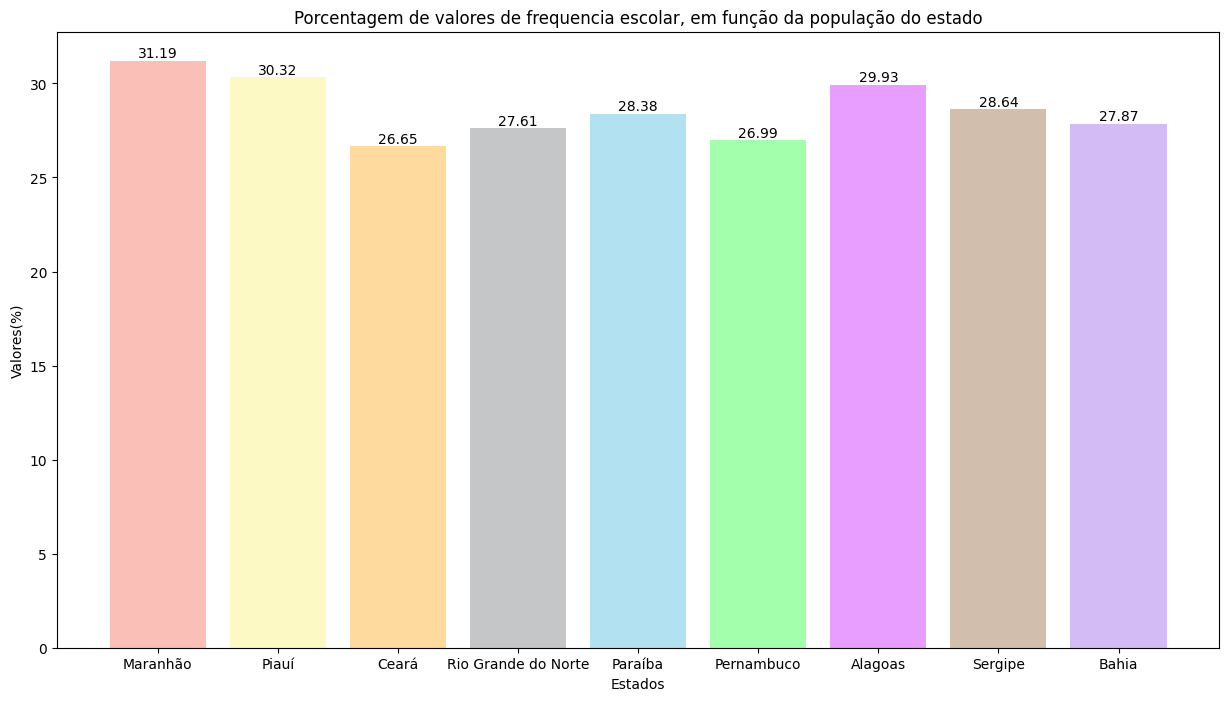

In [ ]:
df_escola_nordeste.set_index('Localidades', inplace=True)

plt.figure(figsize=(15,8))
bars = plt.bar(df_escola_nordeste.index, df_escola_nordeste['total'], color=cores)

plt.title('Porcentagem de valores de frequencia escolar, em função da população do estado')
plt.xlabel('Estados')
plt.ylabel('Valores(%)')

# Adicionando os valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()

No gráfico acima é possível ver os valores da frequência escolar relativa à população dos estados do nordeste. Onde você pode observar que o estado com maior porcentagem de frequência é o estado do Maranhão, e o estado que tem menor representação percentual relativo a sua população é o estado do Ceará

In [ ]:
df_escola_nordeste = df_escola_nordeste.drop('total', axis=1)

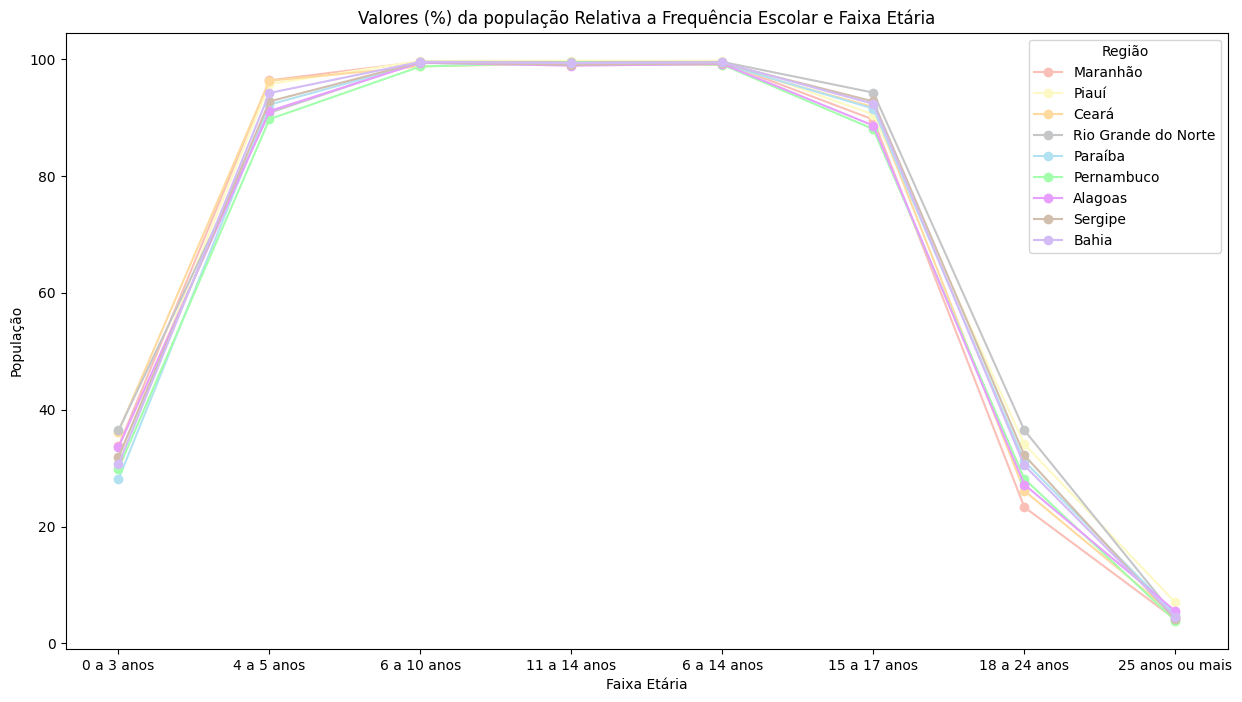

In [ ]:
# Criando uma nova figura com tamanho especificado
fig, ax = plt.subplots(figsize=(15, 8))

# Plotando o gráfico de linhas com pontos
df_escola_nordeste.transpose().plot(kind='line', marker='o', color=cores, ax=ax)

# Configurando o gráfico
ax.set_title('Valores (%) da população Relativa a Frequência Escolar e Faixa Etária')
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('População')
ax.legend(title='Região')

# Mostrando o gráfico
plt.show()

Neste gráfico é possível ver que o comportamento da curva de frequência escolar é bastante semelhante para todos os estados da região nordeste. Apresentando discrepâncias expressivas apenas na faixa etária de 18 a 24 anos.

In [ ]:
df_escola_estado = df_taxa_escola.iloc[[2, 4, 6, 8, 10, 12, 14, 17, 19, 21, 23, 25, 27, 29, 31, 33, 36,
                                       38, 40, 42, 45, 47, 49, 52, 54, 56, 58]]
df_escola_estado

,Localidades,total,0 a 3 anos,4 a 5 anos,6 a 10 anos,11 a 14 anos,6 a 14 anos,15 a 17 anos,18 a 24 anos,25 anos ou mais
2,Rondônia,28.092047,16.152656,85.579010,99.450121,97.558689,98.635756,95.486916,31.409081,5.826684
4,Acre,32.334076,17.935550,75.047880,97.452904,98.550712,97.930238,89.025289,34.504167,6.005173
6,Amazonas,32.028265,15.474859,78.023615,97.609807,98.436334,97.977716,91.401757,29.281128,6.909982
8,Roraima,30.499051,21.491553,80.718321,95.993416,94.675711,95.443717,90.130380,26.322827,5.601726
10,Pará,31.718344,20.463755,86.742087,99.668769,98.567672,99.170318,91.341982,33.015576,5.390445
12,Amapá,30.285765,9.221919,65.661198,98.445134,99.217519,98.811268,91.099670,32.611188,5.612123
14,Tocantins,30.630504,31.538311,90.800691,99.695960,99.260505,99.503243,95.044800,35.495661,5.857711
17,Maranhão,31.189423,33.702035,96.353714,99.556441,99.201488,99.390903,89.652101,23.321049,4.133819
19,Piauí,30.321097,31.641923,95.724260,99.691499,99.717798,99.702894,90.511389,34.093406,7.013230
21,Ceará,26.651303,36.263185,96.296343,98.752632,99.253223,98.980318,91.783609,26.120899,4.726705


In [ ]:
df_escola_estado = df_escola_estado.drop('total', axis=1)

df_escola_estado

,Localidades,0 a 3 anos,4 a 5 anos,6 a 10 anos,11 a 14 anos,6 a 14 anos,15 a 17 anos,18 a 24 anos,25 anos ou mais
2,Rondônia,16.152656,85.579010,99.450121,97.558689,98.635756,95.486916,31.409081,5.826684
4,Acre,17.935550,75.047880,97.452904,98.550712,97.930238,89.025289,34.504167,6.005173
6,Amazonas,15.474859,78.023615,97.609807,98.436334,97.977716,91.401757,29.281128,6.909982
8,Roraima,21.491553,80.718321,95.993416,94.675711,95.443717,90.130380,26.322827,5.601726
10,Pará,20.463755,86.742087,99.668769,98.567672,99.170318,91.341982,33.015576,5.390445
12,Amapá,9.221919,65.661198,98.445134,99.217519,98.811268,91.099670,32.611188,5.612123
14,Tocantins,31.538311,90.800691,99.695960,99.260505,99.503243,95.044800,35.495661,5.857711
17,Maranhão,33.702035,96.353714,99.556441,99.201488,99.390903,89.652101,23.321049,4.133819
19,Piauí,31.641923,95.724260,99.691499,99.717798,99.702894,90.511389,34.093406,7.013230
21,Ceará,36.263185,96.296343,98.752632,99.253223,98.980318,91.783609,26.120899,4.726705


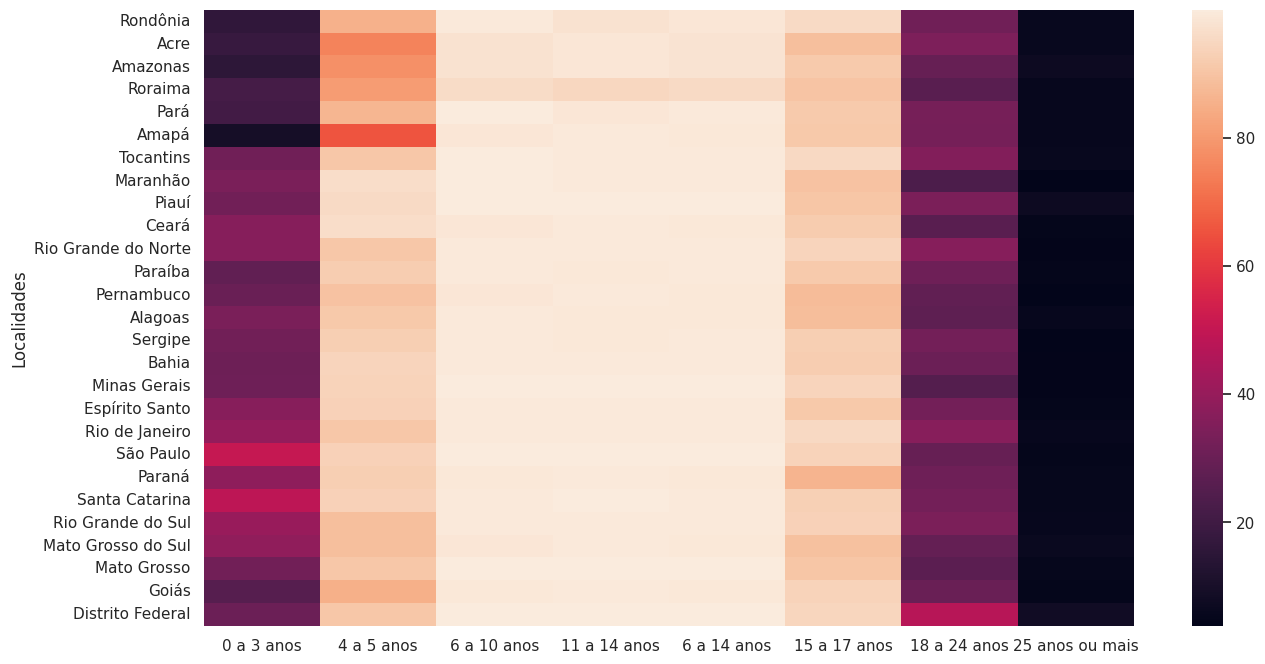

In [ ]:
import seaborn as sns

df_escola_estado.set_index('Localidades', inplace=True)
sns.set(style="white")
cmap = sns.color_palette("rocket", as_cmap=True)

plt.figure(figsize=(15, 8))
sns.heatmap(df_escola_estado, cmap=cmap)

plt.show()

Acima no gráfico 'Heatmap', mostra o comportamento da frequência escolar em todos os estados do brasil. Nele podemos destacar o comportamento de frequência no Amapá, nas faixas etárias de 0 a 3 anos e de 4 a 7 anos, que se mostram em valores bem menores que os outros estados. Ainda é possível perceber que os valores que representam os estados de São Paulo e de Santa Catarina mostram um comportamento inverso, sendo valores mais expressivos que os outros estados do brasil. Assim como referente à faixa etária de 18 a 24 anos mostra um valor alto para o Distrito Federal.